In [ ]:
import numpy as np
x=np.random.rand(20)*8-4
y=np.sin(x)+np.random.rand(20)*0.2
y

array([-0.50112538,  0.41378829,  0.09213973, -0.35245044, -0.14155246,
        0.1875644 ,  0.76465997, -0.41834733,  0.84938708, -0.23180561,
       -0.33809074,  0.55104685,  0.69614961, -0.41981289,  0.96072012,
       -0.49345125, -0.83445394,  0.86938269, -0.85545111, -0.2825566 ])

In [ ]:
omega=np.polyfit(x,y,3) #假設關聯性為3次
omega

array([-0.05207319,  0.00680714,  0.57686775,  0.07073318])

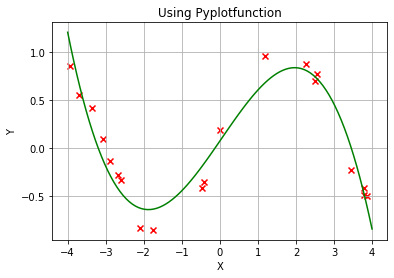

In [ ]:
f=np.poly1d(omega) #產生由高次方往低次方的多項式
import matplotlib.pyplot as plt
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Using Pyplotfunction")
plt.grid() #繪製格線
plt.scatter(x,y,marker="x",c="red") 
xx=np.linspace(-4,4,100)
plt.plot(xx,f(xx),color="green")
plt.show()

鳶尾花分類 機器學習經典案例

In [12]:
import numpy as np
import pandas as pd

In [23]:
df=pd.read_csv('iris.data',header=None)
x=df.iloc[0:100,[0,1,2,3]].values
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',0,1) #品種是否為Iris-setosa
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
x_train=np.empty((80,4))
x_test=np.empty((20,4))
y_train=np.empty(80)
y_test=np.empty(20)

取40份作為訓練資料，取10份作為測試資料

In [25]:
x_train[:40],x_train[40:]=x[:40],x[50:90]
x_test[:10],x_test[10:]=x[40:50],x[90:100]
y_train[:40],y_train[40:]=y[:40],y[50:90]
y_test[:10],y_test[10:]=y[40:50],y[90:100]

In [28]:
#用sigmoid函數做為啟動函數的 演算法 值會介於1~0之間
def sigmoid(x):
    return 1/(1+np.exp(-x))

#啟動函數的運算  矩陣乘法==np.dot()
def activation(x,w,b):
    return sigmoid(np.dot(x,w)+b)  

#更新權重
def update(x,y,w,b,eta): #x是輸入特徵，y是正確答案，w是權重，b是偏差，eta是學習率
    
    y_pred=activation(x,w,b)
    a=(y_pred-y_train)*y_pred*(1-y_pred)
    for i in range(4):
        w[i] -= eta * 1/float(len(y)) * np.sum(a*x[:,i]) #更新權重
    b=b-eta*1/float(len(y))*np.sum(a*x[:,i])
    return w,b #更新權重與偏誤


In [56]:
weights=np.ones(4)/10
bias=np.ones(1)/10
for _ in range(999): # 訓練週期
    weights,bias=update(x_train,y_train,weights,bias,eta=0.9) #eta=是學習率
print("weight=",weights,"bias=",bias)

weight= [-0.63812335 -1.71093082  2.38996206  1.16806019] bias= [1.16806019]


In [57]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [58]:
activation(x_test,weights,bias)

array([0.01042111, 0.10144537, 0.02244255, 0.02971208, 0.02712621,
       0.03451091, 0.01066195, 0.02502035, 0.00878503, 0.01647872,
       0.99410341, 0.99160614, 0.98165792, 0.95677865, 0.98934881,
       0.97890663, 0.9840995 , 0.98279687, 0.89003087, 0.9830013 ])